## Analyze spatial entropy for model realizations

In [1]:
# basic imports
import numpy as np                                        
import matplotlib.pyplot as plt     
import pickle
import pandas as pd

In [ ]:
# adjust settings for matplotlib:


### Load Data

We first load the dataset from the generated `pickle` file:

In [18]:
# realizations = pickle.load(open("facies_realizations_ncut_64x64.pkl", 'rb'))
realizations = pickle.load(open("facies_realizations_ncut_f3_aniso_64x64.pkl", 'rb'))
df = pickle.load(open("data_frame_three_facies.pkl", 'rb'))

df.head()

,index,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,118,195,950.0,829.0,0.0,0.093887,0.262365,3934.477063
1,34,48,600.0,600.0,0.0,0.087710,1.826601,4815.685452
2,177,288,570.0,579.0,0.0,0.089293,2.411069,4453.078357
3,248,402,300.0,849.0,1.0,0.164065,459.734197,4627.017779
4,343,540,100.0,359.0,1.0,0.107368,1.842103,5577.387475


Also, load input data to compare to results:

In [19]:
import sys
sys.path.append("../../../hspace/")
import hspace.measures
import importlib
importlib.reload(hspace.measures)

pymc is not installed - Bayesian entropy estimation will not work.


<module 'hspace.measures' from '../../../hspace/hspace/measures.py'>

In [20]:
h_sec = hspace.measures.EntropySection(realizations)

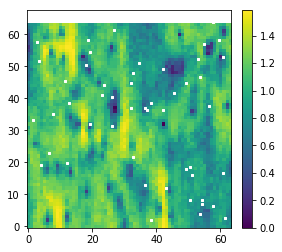

In [21]:
data_points = df.values[:,2:4]/1000*64
h_sec.plot_entropy(data_points=data_points)
# df.plot.scatter(x="X", y="Y", c="Facies", colormap='RdBu')

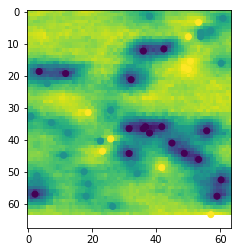

In [22]:
data_points = df.values[:,2:4]/1000*64
plt.imshow(np.sum(realizations, axis=0)[::-1,:])
plt.scatter(data_points[:,0]-0.5, data_points[:,1]-0.5, c=df["Facies"])
# plt.scatter(data_points[:,0], data_points[:,1], c='w')
# df.values[:,2:4]/1000*64
# df.plot.scatter(x="X", y="Y", c="Facies", colormap='viridis')

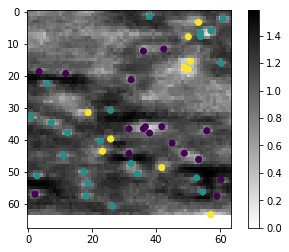

In [23]:
im = plt.imshow(h_sec.h[::-1,:], cmap='gray_r')
plt.scatter(data_points[:,0]-0.5, data_points[:,1]-0.5, c=df["Facies"])
plt.colorbar(im)

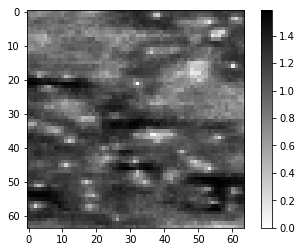

In [25]:
plt.imshow(h_sec.h[::-1,:], cmap='gray_r')
plt.colorbar()